# Loading data

In [927]:
import pandas as pd
import re
import spacy
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sb.set_context('notebook')

In [928]:
male_emigrants_high = pd.DataFrame()

for i in np.hstack([np.arange(1,15,2), np.arange(17,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'High')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
#     print(country)
    
    male_emigrants_high = male_emigrants_high.append(df, ignore_index=True)

male_emigrants_medium = pd.DataFrame()

for i in np.hstack([np.arange(1,15,2), np.arange(17,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'Medium')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
#     print(country)
    
    male_emigrants_medium = male_emigrants_medium.append(df, ignore_index=True)
    

male_emigrants_low = pd.DataFrame()

for i in np.hstack([np.arange(1,15,2), np.arange(17,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
#     print(country)
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'Low ')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
    
    male_emigrants_low = male_emigrants_low.append(df, ignore_index=True)
    

In [929]:
female_emigrants_high = pd.DataFrame()

for i in np.hstack([np.arange(2,15,2), np.arange(18,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'High')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
#     print(country)

    female_emigrants_high = female_emigrants_high.append(df, ignore_index=True)

female_emigrants_medium = pd.DataFrame()

for i in np.hstack([np.arange(2,15,2), np.arange(18,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'High')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
#     print(country)

    female_emigrants_medium = female_emigrants_medium.append(df, ignore_index=True)

female_emigrants_low = pd.DataFrame()

for i in np.hstack([np.arange(2,15,2), np.arange(18,41,2)]):
#     print(i)
    df = pd.read_excel('/Users/aliyadavletshina/Downloads/iabbd_8010_v1-3.xls', sheet_name = i, header=[0,1]).drop([0,1], axis=0)
    country = df.columns[0][0]
    df = df[[(year, educ) for year, educ in df.columns if (educ == 'High')|(educ == 'Total immigration stock')]]
    df.columns = df.columns.droplevel(1)
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010']
    df['country_to']  = country
#     print(country)

    female_emigrants_low = female_emigrants_low.append(df, ignore_index=True)
    
    

In [930]:
all_emigrants_low = pd.merge(male_emigrants_low, female_emigrants_low, on=['country_to', 'country_from'], how='left', suffixes=('_male', '_female'))
for i, col in enumerate(all_emigrants_low.iloc[:, 1:8].columns):
    all_emigrants_low[col] = all_emigrants_low[col]+all_emigrants_low.iloc[:, i+9]
all_emigrants_low = all_emigrants_low.iloc[:, :9]


all_emigrants_medium = pd.merge(male_emigrants_medium, female_emigrants_medium, on=['country_to', 'country_from'], how='left', suffixes=('_male', '_female'))
for i, col in enumerate(all_emigrants_medium.iloc[:, 1:8].columns):
    all_emigrants_medium[col] = all_emigrants_medium[col]+all_emigrants_medium.iloc[:, i+9]
all_emigrants_medium = all_emigrants_medium.iloc[:, :9]


all_emigrants_high = pd.merge(male_emigrants_high, female_emigrants_high, on=['country_to', 'country_from'], how='left', suffixes=('_male', '_female'))
for i, col in enumerate(all_emigrants_high.iloc[:, 1:8].columns):
    all_emigrants_high[col] = all_emigrants_high[col]+all_emigrants_high.iloc[:, i+9]
all_emigrants_high = all_emigrants_high.iloc[:, :9]


In [931]:
for i, df in enumerate([all_emigrants_low, all_emigrants_medium, all_emigrants_high]):
    print(i, df.shape)

0 (3724, 9)
1 (3724, 9)
2 (3724, 9)


# Preparing data

In [932]:
def clean(df, thresh=2000):
    df = df[df['country_from'] != 'Unknown']
    df['total'] = df.iloc[:,1:-1].sum(axis=1)
    df = df[df['total'] > thresh]
    df.columns = ['country_from', '1980', '1985', '1990', '1995', '2000', '2005', '2010', 'country_to', 'total']
    return df

all_emigrants_low = clean(all_emigrants_low)
all_emigrants_medium = clean(all_emigrants_medium)
all_emigrants_high = clean(all_emigrants_high)

all_emigrants_low_cut = clean(all_emigrants_low, 70000)
all_emigrants_medium_cut = clean(all_emigrants_medium, 70000)
all_emigrants_high_cut = clean(all_emigrants_high, 70000)

In [933]:
all_emigrants_low.to_csv('all_emigrants_low.csv')
all_emigrants_medium.to_csv('all_emigrants_medium.csv')
all_emigrants_high.to_csv('all_emigrants_high.csv')

all_emigrants_low_cut.to_csv('all_emigrants_low.csv')
all_emigrants_medium_cut.to_csv('all_emigrants_medium.csv')
all_emigrants_high_cut.to_csv('all_emigrants_high.csv')

In [940]:
all_emigrants_low.groupby('country_to').country_from.count()
all_emigrants_medium.groupby('country_to').country_from.count()
all_emigrants_high.groupby('country_to').country_from.count()

all_emigrants_low.country_from.nunique()
all_emigrants_medium.country_from.nunique()
all_emigrants_high.country_from.nunique()

179

In [800]:
all_emigrants_high.country_from.unique()

array(['Canada', 'Chile', 'China', 'China, Hong Kong SAR', 'Croatia',
       'Egypt', 'Fiji', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Italy', 'Japan', 'Korea', 'Lebanon',
       'Macedonia', 'Malaysia', 'Netherlands', 'New Zealand',
       'Philippines', 'Poland', 'Serbia and Montenegro', 'Singapore',
       'South Africa', 'Sri Lanka', 'United Kingdom', 'United States',
       'Vietnam', 'Algeria', 'Australia', 'Austria', 'Belgium',
       'Bosnia and Herzegovina', 'Czech Republic', 'Denmark', 'France',
       'Guyana', 'Haiti', 'Iran', 'Jamaica', 'Kenya', 'Mexico', 'Morocco',
       'Pakistan', 'Portugal', 'Romania', 'Russia', 'Switzerland',
       'Taiwan', 'Trinidad and Tobago', 'Ukraine', 'Argentina', 'Spain',
       'Turkey', 'Tunisia', 'Bangladesh', 'Cyprus', 'Ghana', 'Nigeria',
       'Uganda', 'Zimbabwe', 'Albania', 'Georgia', 'Suriname', 'Angola',
       'Mozambique', 'Finland', 'Sweden', 'Afghanistan', 'Armenia',
       'Barbados', 'Belarus',

# EDA

<AxesSubplot:xlabel='country_to', ylabel='value'>

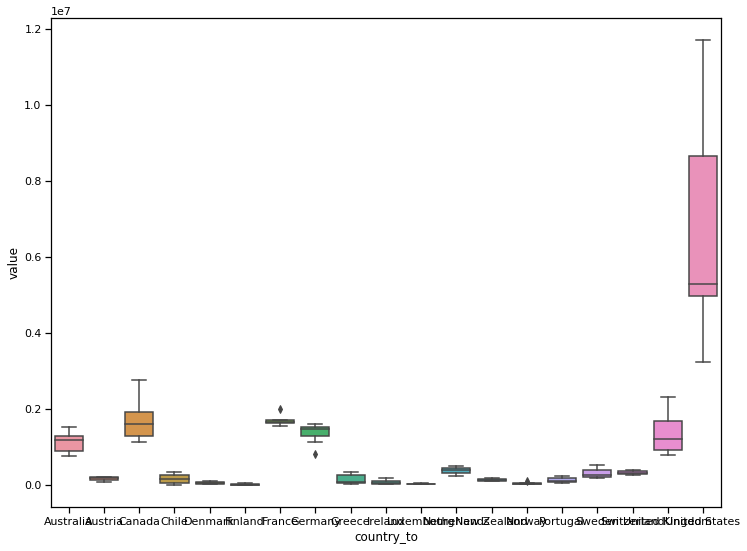

In [941]:
plt.figure(figsize=(12,9))
sns.boxplot(x='country_to', y='value', data=all_emigrants_low.groupby('country_to').sum().iloc[:, :-1].\
            reset_index().melt('country_to')[['country_to', 'value']])


# sns.boxplot(all_emigrants_low.groupby('country_to').sum().iloc[:, :-1].reset_index().melt('country_to')[['country_to']],
#            all_emigrants_low.groupby('country_to').sum().iloc[:, :-1].reset_index().melt('country_to')[['value']])


In [1192]:
all_emigrants_medium.head()

country_from      1980      1985      1990      1995       2000  \
0     Afghanistan  0.000000  0.000000  0.688051  0.959125   1.356416   
1         Albania  0.789907  0.647552  0.571801  0.558240   0.556006   
6       Argentina  1.267906  1.312180  1.478706  1.508022   1.444946   
9         Austria  2.296526  2.133695  2.310450  2.023717   1.906046   
13     Bangladesh  0.377034  0.405376  0.592205  0.928909   1.167920   
...           ...       ...       ...       ...       ...        ...   
3718    Venezuela  1.996032  2.468593  2.844570  3.365901   3.822215   
3719      Vietnam  4.907957  7.576357  8.711779  9.012793  10.379476   
3720        Yemen  0.949015  1.198696  1.102003  1.025944   1.273971   
3721       Zambia  0.349456  0.498516  0.642843  0.466370   0.468155   
3722     Zimbabwe  0.665344  0.852605  1.016035  1.098775   1.166437   

           2005       2010     country_to      total  \
0      1.281734   1.218431      Australia    12269.0   
1      0.508772   0.465520      Australia     3648.0   
6      1.419193   1.402559      Australia    22567.0   
9      1.796153   1.702228      Australia    44014.0   
13     1.160871   1.159584      Australia    10586.0   
...         ...        ...            ...        ...   
3718   4.603691   4.681066  United States   162815.0   
3719  11.062885  11.277752  United States  1069930.0   
3720   1.668121   1.583460  United States    20705.0   
3721   0.514771   0.512142  United States     2859.0   
3722   1.452420   1.441501  United States    16381.0   

                           edges  
0       (Afghanistan, Australia)  
1           (Albania, Australia)  
6         (Argentina, Australia)  
9           (Austria, Australia)  
13       (Bangladesh, Australia)  
...                          ...  
3718  (Venezuela, United States)  
3719    (Vietnam, United States)  
3720      (Yemen, United States)  
3721     (Zambia, United States)  
3722   (Zimbabwe, United States)  

[1268 rows x 11 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'United States'),
  Text(0, 1, 'Canada'),
  Text(0, 2, 'United Kingdom'),
  Text(0, 3, 'Germany'),
  Text(0, 4, 'Australia'),
  Text(0, 5, 'France'),
  Text(0, 6, 'Netherlands'),
  Text(0, 7, 'Sweden'),
  Text(0, 8, 'Chile'),
  Text(0, 9, 'Switzerland'),
  Text(0, 10, 'Austria'),
  Text(0, 11, 'New Zealand'),
  Text(0, 12, 'Greece'),
  Text(0, 13, 'Norway'),
  Text(0, 14, 'Denmark'),
  Text(0, 15, 'Portugal'),
  Text(0, 16, 'Ireland'),
  Text(0, 17, 'Finland'),
  Text(0, 18, 'Luxembourg')])

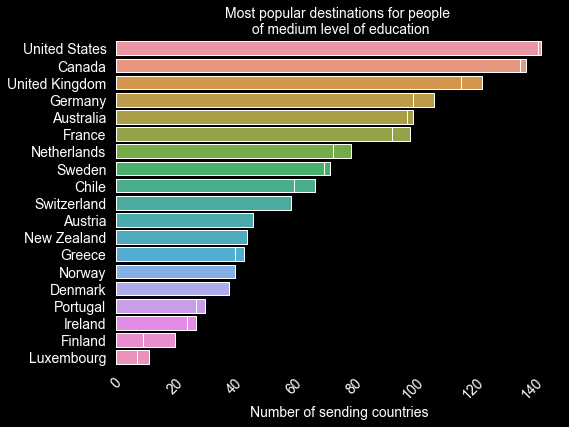

In [1247]:
import seaborn as sns

# sns.set_theme(style="whitegrid")
plt.style.use("seaborn-dark-palette")
mpl.rcParams['font.size'] = 14
plt.figure(figsize = (8, 6))           
b = sns.barplot(y = all_emigrants_high.groupby('country_to').country_from.count().sort_values(ascending=False).reset_index()['country_to'].values, 
            x = all_emigrants_high.groupby('country_to').country_from.count().sort_values(ascending=False))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, size=14)
# b.set_ylabel("Number of sending countries", fontsize=14)
b.set_xlabel("Number of sending countries", fontsize=14)
b.axes.set_title("Most popular destinations for people \n of high level of education",fontsize=14)
# b.set_xticklabels(rotation=45)
plt.yticks(size=14)

b = sns.barplot(y = all_emigrants_low.groupby('country_to').country_from.count().sort_values(ascending=False).reset_index()['country_to'].values, 
            x = all_emigrants_low.groupby('country_to').country_from.count().sort_values(ascending=False))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, size=14)
# b.set_ylabel("Number of sending countries", fontsize=14)
b.set_xlabel("Number of sending countries", fontsize=14)
b.axes.set_title("Most popular destinations for people \n of low level of education",fontsize=14)
# b.set_xticklabels(rotation=45)
plt.yticks(size=14)

b = sns.barplot(y = all_emigrants_medium.groupby('country_to').country_from.count().sort_values(ascending=False).reset_index()['country_to'].values, 
            x = all_emigrants_medium.groupby('country_to').country_from.count().sort_values(ascending=False))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, size=14)
# b.set_ylabel("Number of sending countries", fontsize=14)
b.set_xlabel("Number of sending countries", fontsize=14)
b.axes.set_title("Most popular destinations for people \n of medium level of education",fontsize=14)
# b.set_xticklabels(rotation=45)
plt.yticks(size=14)

In [1220]:
all_emigrants_high_from_plot = all_emigrants_high.sort_values(['total', 'country_from'], ascending=False).iloc[:27, 1:9].groupby('country_from').sum().reset_index().melt('country_from')

In [1225]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), 
             (23, 190, 207), 
             (158, 218, 229)]    
 

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
len(tableau20)

20

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

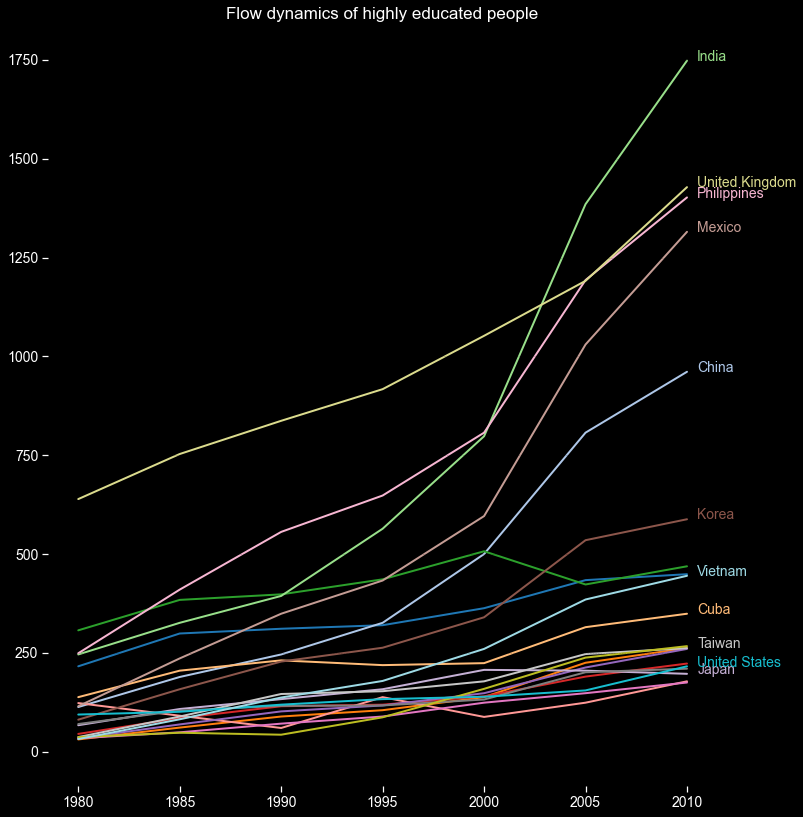

In [1244]:

# sns.set(style="ticks", context="talk")
plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(12, 14))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
     
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# plt.ylim(0, 350)
# plt.xlim(979, 2012)
plt.title("Flow dynamics of highly educated people", fontsize=17, ha="center") 

for i, country in enumerate(all_emigrants_high_from_plot['country_from'].unique()):
#     if country != 'United States':
        plt.plot(np.arange(1980, 2011, 5),    
                all_emigrants_high_from_plot[all_emigrants_high_from_plot['country_from']==country]['value'].values // 1000,
                        lw=2, 
                color=tableau20[i]
                )
        y_pos = all_emigrants_high_from_plot[all_emigrants_high_from_plot['country_from']==country]['value'].values[-1]//1000 - 0.5
 
        if country not in ['Germany', 'Canada', 'New Zealand', 'Ireland', 'Iran','Poland', 'Jamaica', 'Colombia', 'Ukraine']:
            plt.text(2010.5, y_pos, country, fontsize=14, color=tableau20[i])  
            
for y in range(0, 1751, 250):    
    plt.plot(range(1980, 2011, 5), np.repeat(y, len(range(1980, 2011, 5))), "--", lw=0.5, color="black", alpha=0.3) 

plt.xticks(size=14)
plt.yticks(size=14)

# plt.savefig("Migrants-mid-education.png")
# plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
mpl.rcParams['font.size'] = 14
plt.figure(figsize = (8, 6))           
b = sns.barplot(y = all_emigrants_high.groupby('country_from').country_from.count().sort_values(ascending=False).reset_index()['country_to'].values, 
            x = all_emigrants_high.groupby('country_to').country_from.count().sort_values(ascending=False))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, size=14)
# b.set_ylabel("Number of sending countries", fontsize=14)
b.set_xlabel("Number of sending countries", fontsize=14)
b.axes.set_title("Most popular destinations for people \n of high level of education",fontsize=14)
# b.set_xticklabels(rotation=45)
plt.yticks(size=14)

In [1223]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), 
             (23, 190, 207), 
             (158, 218, 229)]    
 

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
tableau20[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [935]:
all_emigrants_low_plot = all_emigrants_low.iloc[:, range(1,9)].melt('country_to').groupby(['country_to', 'variable'])['value'].sum().reset_index()
all_emigrants_medium_plot = all_emigrants_medium.iloc[:, range(1,9)].melt('country_to').groupby(['country_to', 'variable'])['value'].sum().reset_index()
all_emigrants_high_plot = all_emigrants_high.iloc[:, range(1,9)].melt('country_to').groupby(['country_to', 'variable'])['value'].sum().reset_index()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

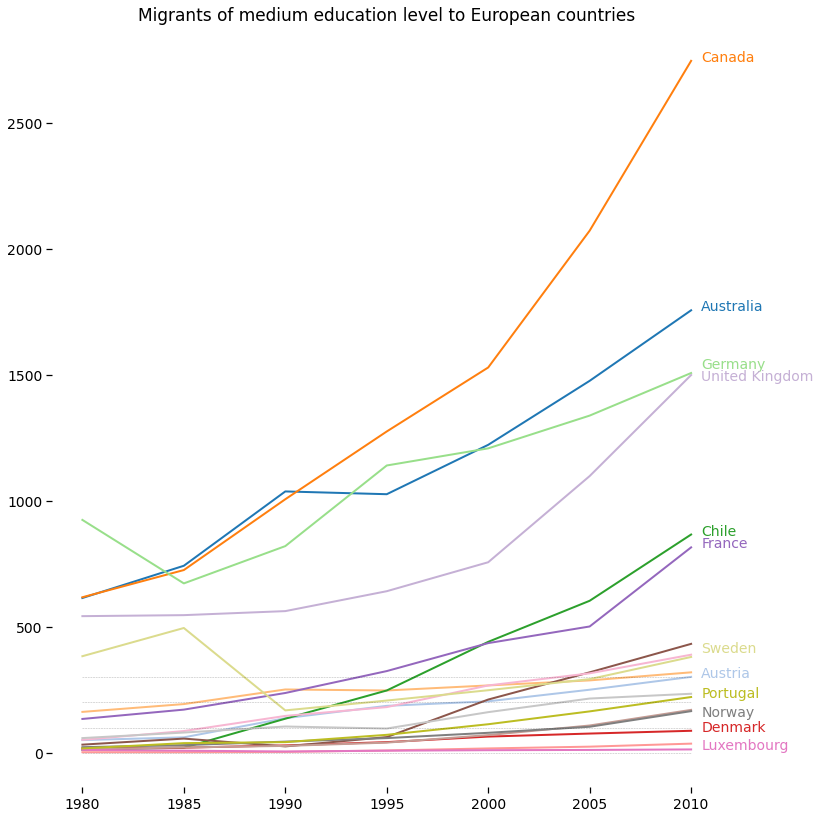

In [994]:
plt.figure(figsize=(12, 14))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
     
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# plt.ylim(0, 350)
# plt.xlim(1979, 2012)
plt.title("Migrants of medium education level to European countries", fontsize=17, ha="center") 

for i, country in enumerate(destinations):
    if country != 'United States':
        plt.plot(np.arange(1980, 2011, 5),    
                all_emigrants_medium_plot[all_emigrants_medium_plot['country_to']==country]['value'].values // 1000,
                        lw=2, 
                color=tableau20[i]
                )
        y_pos = all_emigrants_medium_plot[all_emigrants_medium_plot['country_to']==country]['value'].values[-1]//1000 - 0.5
    
        if country == "Sweden":    
            y_pos += 20  
        elif country == "Switzerland":    
            y_pos += 30   
        elif country == "Ireland":    
            y_pos -= 5 
        elif country == "United Kingdom":    
            y_pos -= 20
        elif country == "Germany":    
            y_pos += 20
        elif country == "Greece":    
            y_pos += 50
        elif country == "Netherlands":    
            y_pos += 45
        elif country == "Portugal":    
            y_pos += 2
        elif country == "Finland":    
            y_pos += 2
        elif country == "New Zealand":    
            y_pos += 24
        elif country == "Norway":    
            y_pos -= 20
        elif country == "Luxemburg":    
            y_pos -= 55
        elif country == "Portugal":    
            y_pos -= 35
        elif country == "Norway":    
            y_pos -= 65
        if country not in ['New Zealand', 'Ireland', 'Switzerland', 'Netherlands', 'Greece','Finland']:
            plt.text(2010.5, y_pos, country, fontsize=14, color=tableau20[i])  
            
for y in range(0, 350, 100):    
    plt.plot(range(1980, 2011, 5), np.repeat(y, len(range(1980, 2011, 5))), "--", lw=0.5, color="black", alpha=0.3) 

plt.xticks(size=14)
plt.yticks(size=14)

# plt.savefig("Migrants-mid-education.png")
# plt.show()

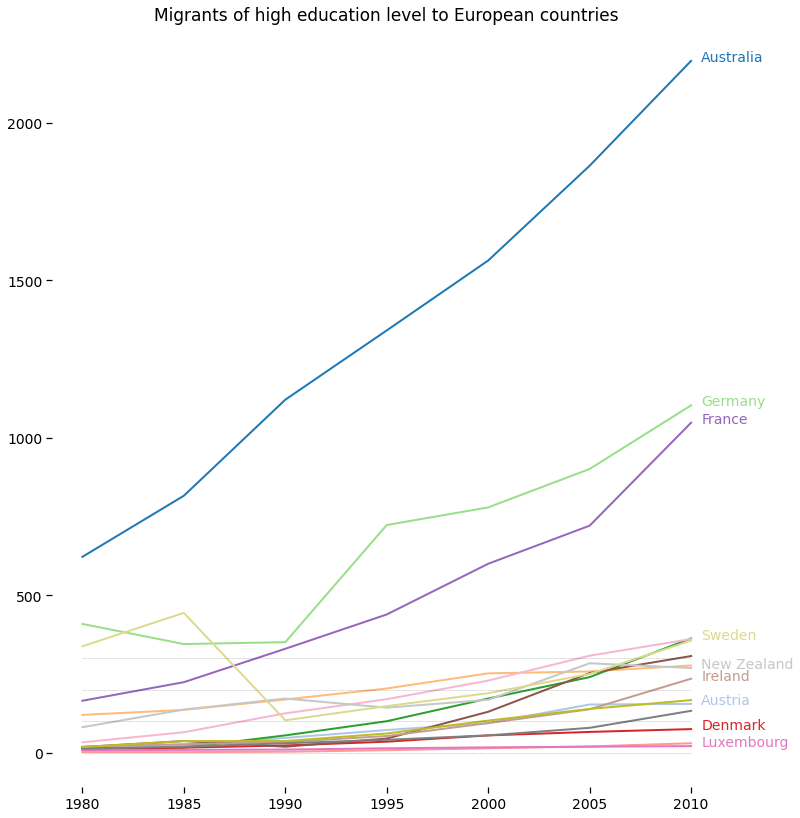

In [991]:
plt.figure(figsize=(12, 14))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# plt.ylim(0, 350)
# plt.xlim(1979, 2012)
plt.title("Migrants of high education level to European countries", fontsize=17, ha="center") 

for i, country in enumerate(destinations):
    if (country != 'United States') & (country != 'Canada') & (country != 'United Kingdom'):
        plt.plot(np.arange(1980, 2011, 5),    
                all_emigrants_high_plot[all_emigrants_high_plot['country_to']==country]['value'].values // 1000,
                        lw=2, 
                color=tableau20[i]
                )
        y_pos = all_emigrants_high_plot[all_emigrants_high_plot['country_to']==country]['value'].values[-1]//1000 - 0.5
    
        if country == "Sweden":    
            y_pos += 5  
        elif country == "Switzerland":    
            y_pos += 5    
        elif country == "Ireland":    
            y_pos -= 5 
#         elif country == "Denmark":    
#             y_pos -= 5
        elif country == "Portugal":    
            y_pos += 2
        elif country == "Finland":    
            y_pos += 2
        if country not in ['Finland', 'Norway', 'Portugal', 'Netherlands', 'Greece', 'Switzerland' ,'Chile']:
            plt.text(2010.5, y_pos, country, fontsize=14, color=tableau20[i])  
            
for y in range(0, 350, 100):    
    plt.plot(range(1980, 2011, 5), np.repeat(y, len(range(1980, 2011, 5))), "--", lw=0.5, color="black", alpha=0.3) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(size=14)
plt.yticks(size=14)

plt.savefig("Migrants-high-education.png")
# plt.show()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

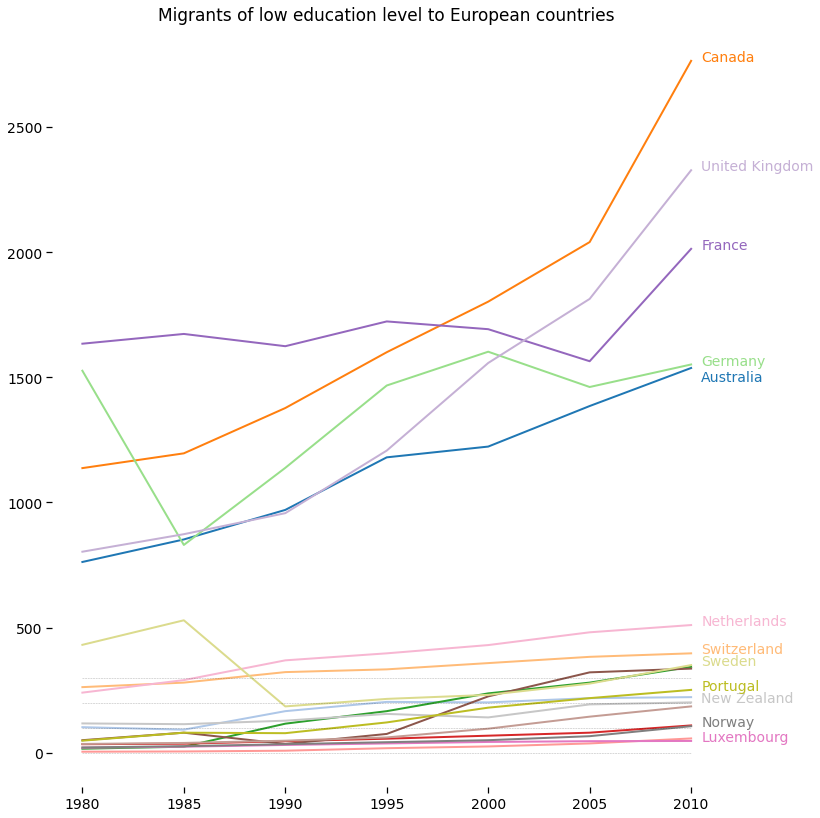

In [1005]:
plt.figure(figsize=(12, 14))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.title("Migrants of low education level to European countries", fontsize=17, ha="center") 

for i, country in enumerate(destinations):
    if country != 'United States':
        plt.plot(np.arange(1980, 2011, 5),    
                all_emigrants_low_plot[all_emigrants_low_plot['country_to']==country]['value'].values//1000,
                        lw=2, 
                color=tableau20[i]
                )
        y_pos = all_emigrants_low_plot[all_emigrants_low_plot['country_to']==country]['value'].values[-1]//1000 - 0.5
        
        if country == "Australia":    
            y_pos -= 50
        if country not in ['Finland', 'Ireland', 'Greece', 'Denmark','Chile', 'Austria']:
            plt.text(2010.5, y_pos, country, fontsize=14, color=tableau20[i])  
            
for y in range(0, 350, 100):    
    plt.plot(range(1980, 2011, 5), np.repeat(y, len(range(1980, 2011, 5))), "--", lw=0.5, color="black", alpha=0.3) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(size=14)
plt.yticks(size=14)

# plt.savefig("Migrants-high-education.png")
# plt.show()

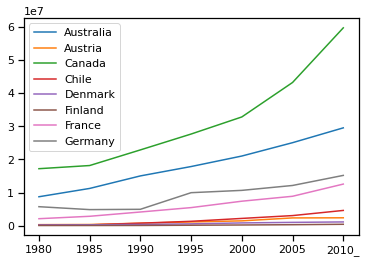

In [70]:
# TODO: make pretty plots, distributions, bars and histograms.. maybe use R - old project stuff 

for col in all_emigrants.groupby('country_to').sum('1980').T.columns[:8]:
    plt.plot(all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:].index, all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:][col], label=col)
    plt.legend()

In [ ]:
# all_emigrants_low

In [ ]:
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)


In [1021]:
all_emigrants_low_hist = all_emigrants_low.iloc[:, range(0,9)].melt(['country_to', 'country_from'])


# all_emigrants_low_hist.sort_values('value', ascending=False).groupby(['country_to', 'variable','country_from']).first(5)[:10]

# all_emigrants_low_hist.sort_values(['value', 'variable', 'country_to','country_from'], ascending=False)
# # all_emigrants_low_hist.sort_values(['country_to', 'variable', 'value'], ascending=False).groupby(['country_to', 'variable'])['country_from', 'value'].first(5)

country_to      country_from variable      value
8817  United States            Mexico     2010  3540570.0
7549  United States            Mexico     2005  3103875.0
6281  United States            Mexico     2000  2083560.0
2477  United States            Mexico     1985  1297804.0
3745  United States            Mexico     1990  1188810.0
...             ...               ...      ...        ...
26        Australia          Ethiopia     1980        0.0
24        Australia       El Salvador     1980        0.0
16        Australia  China, Macao SAR     1980        0.0
9         Australia            Brunei     1980        0.0
0         Australia       Afghanistan     1980        0.0

[8876 rows x 4 columns]

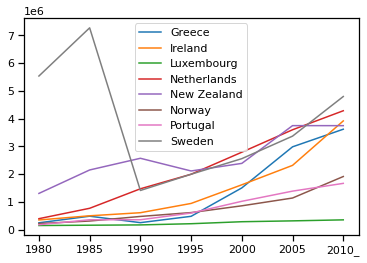

In [71]:
for col in all_emigrants.groupby('country_to').sum('1980').T.columns[8:16]:
    plt.plot(all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:].index, all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:][col], label=col)
    plt.legend()

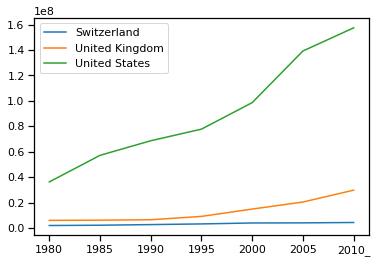

In [72]:
for col in all_emigrants.groupby('country_to').sum('1980').T.columns[16:21]:
    plt.plot(all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:].index, all_emigrants.groupby('country_to').sum('1980').T.iloc[:-3,:][col], label=col)
    plt.legend()

In [88]:
all_emigrants.sort_values('2010_grouped_from', ascending=False)
country_from_by_year = all_emigrants.groupby('country_from')['1980', '1985', '1990', '1995', '2000', '2005', '2010_'].sum().sort_values('2010_', ascending=False)

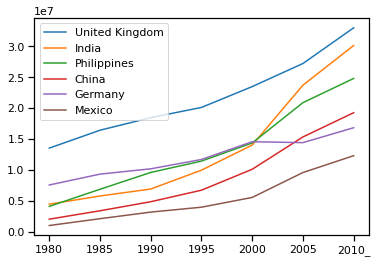

In [108]:
for col in country_from_by_year.T.columns[:6]:
    plt.plot(country_from_by_year.T.loc[:, col], label=col)
plt.legend()

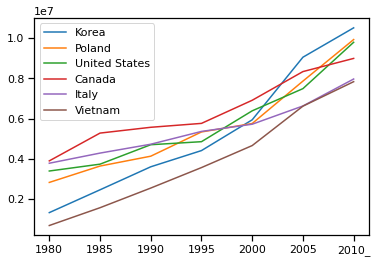

In [109]:
for col in country_from_by_year.T.columns[6:12]:
    plt.plot(country_from_by_year.T.loc[:, col], label=col)
plt.legend()

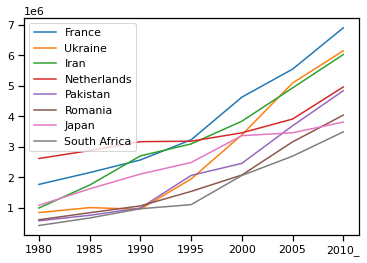

In [110]:
for col in country_from_by_year.T.columns[12:20]:
    plt.plot(country_from_by_year.T.loc[:, col], label=col)
plt.legend()

# Building a network

In [1178]:
df_names = ['all_emigrants_low', 'all_emigrants_medium', 'all_emigrants_high']

def get_data_for_pyvis(df_name, year):
    
    df = pd.read_csv(f'{df_name}.csv')
    df = df[['country_from', 'country_to', year]]
    df = pd.merge(df, 
             df.groupby('country_to')[year].sum().reset_index().rename({year:'total_to'}, axis=1), on='country_to')
    df['weight'] = df[year]*100 / df['total_to']
    df = df[['country_from', 'country_to', 'weight']]
    return df

all_emigrants_low_2010 = get_data_for_pyvis('all_emigrants_low', '2010')
all_emigrants_medium_2010 = get_data_for_pyvis('all_emigrants_medium', '2010')
all_emigrants_high_2010 = get_data_for_pyvis('all_emigrants_high', '2010')



In [1179]:
all_emigrants_high_2010.head()

country_from     country_to    weight
0                  Canada      Australia  1.317596
1                   Chile      Australia  1.020219
2                   China      Australia  5.727175
3    China, Hong Kong SAR      Australia  2.102380
4                 Croatia      Australia  1.104537
..                    ...            ...       ...
251               Ukraine  United States  2.035579
252        United Kingdom  United States  3.074399
253            Uzbekistan  United States  0.225577
254             Venezuela  United States  0.724279
255               Vietnam  United States  3.390074

[256 rows x 3 columns]

In [1181]:
sources = all_emigrants_low_2010['country_from']
targets = all_emigrants_low_2010['country_to']
weights = all_emigrants_low_2010['weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('migration.html')

## Unoriented graph

In [1022]:
import networkx as nx
import matplotlib.pyplot as plt

In [1049]:
G_low = nx.DiGraph()
G_medium = nx.DiGraph()
G_high = nx.DiGraph()

In [1050]:
# number of migrants in each destination country by education level, each given year

all_emigrants_low_to = all_emigrants_low_cut.groupby('country_to').sum().iloc[:, :-1].to_dict()
all_emigrants_medium_to = all_emigrants_medium.groupby('country_to').sum().iloc[:, :-1].to_dict()
all_emigrants_high_to = all_emigrants_high.groupby('country_to').sum().iloc[:, :-1].to_dict()

all_emigrants_low_from = all_emigrants_low_cut.groupby('country_from').sum().iloc[:, :-1].to_dict()
all_emigrants_medium_from = all_emigrants_medium.groupby('country_from').sum().iloc[:, :-1].to_dict()
all_emigrants_high_from = all_emigrants_high.groupby('country_from').sum().iloc[:, :-1].to_dict()

In [1051]:
destinations = all_emigrants_low['country_to'].unique()

In [1052]:
# removing European countries from departure list 

for m in [all_emigrants_low_from, all_emigrants_medium_from,all_emigrants_high_from]:
    for d in destinations:
        for year in m.keys():
            try:
                m[year].pop(d)
            except KeyError:
                continue

In [1053]:
# merging dictionaries of departure and destination

for year in all_emigrants_low_to.keys():
    for to, fr in zip([all_emigrants_low_to[year], all_emigrants_medium_to[year],all_emigrants_high_to[year]],
                      [all_emigrants_low_from[year], all_emigrants_medium_from[year],all_emigrants_high_from[year]]):
        to.update(fr)

In [1054]:
# edges for three networks - low, medium and high education level

edges_low = [(i,j) for i,j in zip(all_emigrants_low_cut.country_from, all_emigrants_low_cut.country_to)]
edges_medium = [(i,j) for i,j in zip(all_emigrants_medium.country_from, all_emigrants_medium.country_to)]
edges_high = [(i,j) for i,j in zip(all_emigrants_high.country_from, all_emigrants_high.country_to)]

In [1055]:
# add nodes and edges to networks

G_low.add_edges_from(edges_low)
G_medium.add_edges_from(edges_medium)
G_high.add_edges_from(edges_high)

In [1056]:
graphs = [G_low, G_medium, G_high]
dfs_to = [all_emigrants_low_to, all_emigrants_medium_to, all_emigrants_high_to]
dfs_from = [all_emigrants_low_from, all_emigrants_medium_from, all_emigrants_high_from]
years = ['1980', '1985', '1990', '1995', '2000', '2005', '2010']

for g in graphs:
    print(len(g.nodes), len(g.edges))

104 244
175 1222
179 1265


In [1085]:
# getting node colors for each graph

def get_node_colors(df_from, graph, year):
    node_colors = {}
    for country in graph.nodes():
        if country in df_from[year].keys():
            node_colors[country] = 'red'
        elif country in destinations: 
            node_colors[country] = 'green'
        else:
            node_colors[country] = 'grey'
            
#         print(node_colors)
    return [node_colors.get(country) for country in graph.nodes()]

def get_node_size(df_to, df_from, graph, year):
    
    node_sizes = []
    for i in range(len(graph.nodes())):
        if list(graph.nodes())[i] in destinations:
            node_sizes.append(df_to[year].get(list(graph.nodes())[i]))
        else:
            node_sizes.append(df_from[year].get(list(graph.nodes())[i]))

#     node_sizes = [df_to[year].get(list(graph.nodes())[i]) for i in range(len(graph.nodes()))]
#     print(node_sizes)
    node_sizes = np.array(node_sizes)*10000 / sum(node_sizes)
    
    return node_sizes

def get_labels(df_to, df_from, graph, year):
    labels = list(G_high.nodes())
    mean_node_size = get_node_size(df_to, df_from, graph, year).mean()
    big_nodes = [k for k,v in zip(graph.nodes(), get_node_size(df_to, df_from, graph, year)) if v > mean_node_size] 
    labels = {}
    for node in graph.nodes():
        if node in big_nodes:
            labels[node] = node
    return labels

In [1086]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


def draw_graph(graph, df_to, df_from, year):
    plt.figure(figsize=(15,12))
    node_sizes = get_node_size(df_to, df_from, graph, year)
    node_color = get_node_colors(df_from, graph, year)
    labels = get_labels(df_to, df_from, graph, year)
    pos = nx.layout.kamada_kawai_layout(graph)
    nodes = nx.draw_networkx_nodes(graph, pos, node_size = node_sizes, node_color = node_color)
    edges = nx.draw_networkx_edges(
        graph,
        pos,
        node_size=node_sizes,
        arrowstyle="->",
        arrowsize=9,
        alpha = 0.5,
        edge_color='grey',
#         edge_cmap=plt.cm.Blues,
        width=2)
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)

In [1083]:
# [all_emigrants_low_to['1985'].get(list(G_low.nodes())[i]) for i in range(len(G_low.nodes()))]
# all_emigrants_low_to

{'1980': {'Australia': 649752.0,
  'Austria': 74462.0,
  'Canada': 968159.0,
  'Chile': 3670.0,
  'France': 1507031.0,
  'Germany': 1422582.0,
  'Greece': 42015.0,
  'Ireland': 28395.0,
  'Luxembourg': 7915.0,
  'Netherlands': 166336.0,
  'New Zealand': 83487.0,
  'Portugal': 38665.0,
  'Sweden': 373860.0,
  'Switzerland': 207003.0,
  'United Kingdom': 726561.0,
  'United States': 3133819.0,
  'Albania': 683.0,
  'Algeria': 313716.0,
  'Angola': 16375.0,
  'Argentina': 18596.0,
  'Armenia': 10981.0,
  'Bangladesh': 12977.0,
  'Barbados': 14956.0,
  'Belarus': 4635.0,
  'Belgium': 47113.0,
  'Bolivia': 2464.0,
  'Bosnia and Herzegovina': 126856.0,
  'Brazil': 13162.0,
  'Cambodia': 12380.0,
  'Cape Verde': 8682.0,
  'China': 117317.0,
  'China, Hong Kong SAR': 40000.0,
  'Colombia': 27908.0,
  'Costa Rica': 5984.0,
  'Croatia': 155327.0,
  'Cuba': 153872.0,
  'Cyprus': 14405.0,
  'Czech Republic': 16058.0,
  'Dominican Republic': 35408.0,
  'Ecuador': 17502.0,
  'Egypt': 16211.0,
  'El 

[3289.0, 742725.0, 32926.0, 61200.0, 11955.0, 40960.0, 89567.0, 26327.0, 490.0, 8140.0, 10401.0, 725362.0, 20787.0, 135370.0, 56802.0, 2308.0, 55049.0, 101890.0, 24995.0, 38610.0, 20410.0, 25904.0, 45936.0, 32821.0, 24201.0, 6394.0, 7913.0, 2396.0, 171965.0, 672195.0, 11472.0, 56462.0, 79985.0, 205464.0, 36254.0, 61639.0, 12193.0, 21419.0, 26609.0, 350379.0, 86878.0, 7249.0, 21488.0, 109221.0, 785.0, 12965.0, 28078.0, 32325.0, 22362.0, 26216.0, 26060.0, 17432.0, 8982.0, 264249.0, 8678.0, 86505.0, 80590.0, 17577.0, 30424.0, 6057.0, 47823.0, 2800.0, 32001.0, 293101.0, 198343.0, 38536.0, 42227.0, 16518.0, 5465.0, 21838.0, 178.0, 11309.0, 22173.0, 11423.0, 158.0, 2867.0, 31884.0, 81960.0, 17588.0, 1398.0, 495809.0, 193397.0, 11990.0, 48202.0, 9661.0, 19401.0, 1191.0, 3676.0, 40327.0, 192383.0, 9678.0, 48098.0, 546831.0, 3332194.0, 8366.0, 10582.0, 89803.0, 2581.0, 5302.0, 3109.0, 15327.0, 13218.0, 15923.0, 2585.0, 8838.0, 4791.0, 3722.0, 18705.0, 4953.0, 6376.0, 55.0, 3418.0, 4312.0, 8672.

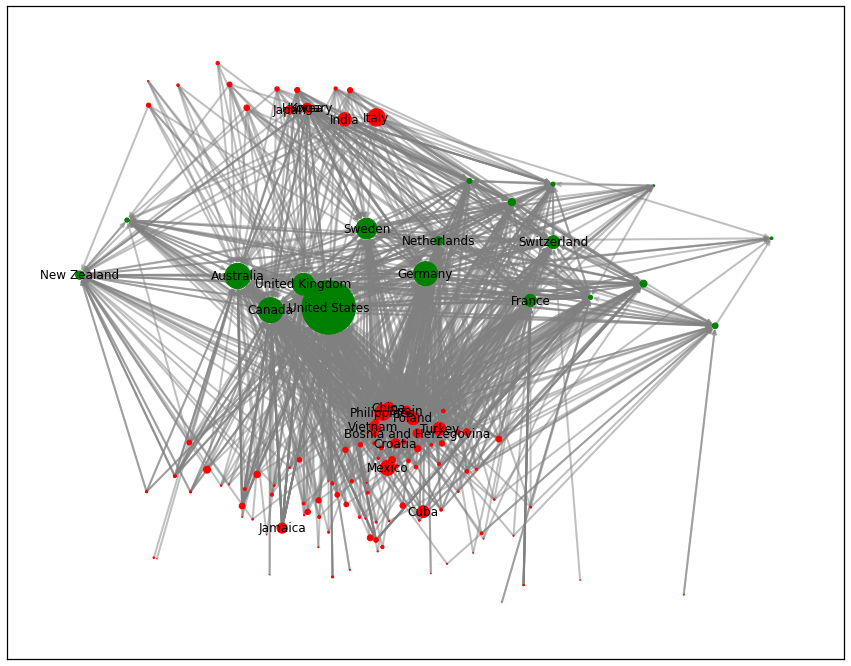

In [1087]:
draw_graph(G_medium, all_emigrants_medium_to, all_emigrants_medium_from, '1985')
# node_sizes

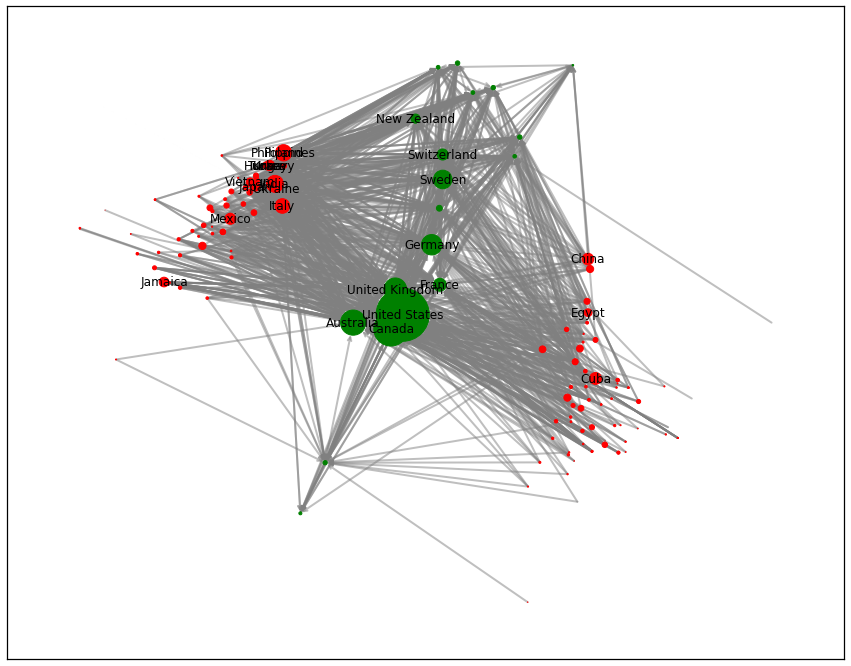

In [472]:
draw_graph(G_high, all_emigrants_high_to, all_emigrants_high_from, '1980')

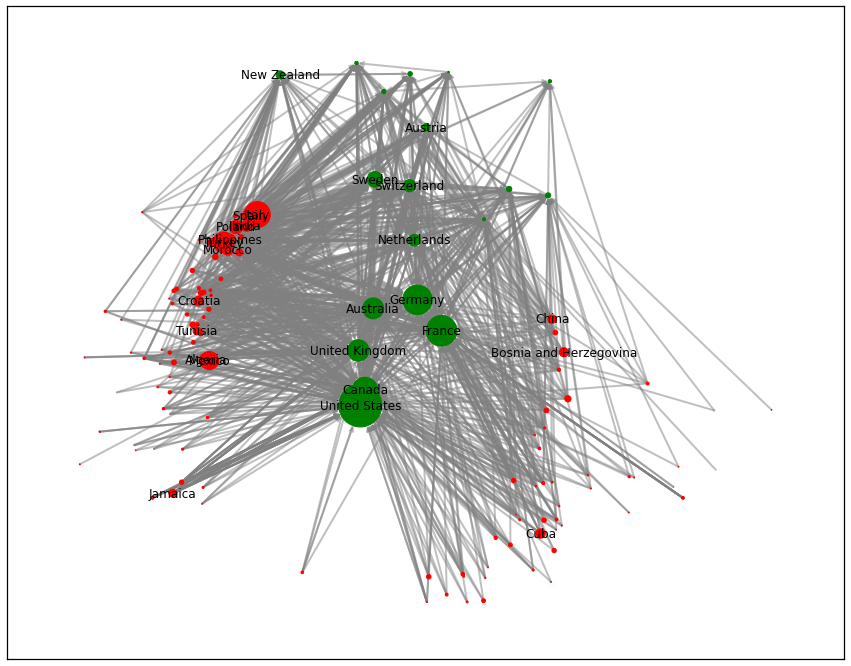

In [473]:
draw_graph(G_low, all_emigrants_low_to, all_emigrants_low_from, '1980')

In [530]:
nx.layout.kamada_kawai_layout(G_medium)['Afghanistan']

array([ 0.02834208, -0.02922461])

In [531]:
# TAKES OVER 20 MIN TO RUN 

import plotly.graph_objects as go

edge_x = []
edge_y = []
for edge in G_medium.edges():
    x0, y0 = nx.layout.kamada_kawai_layout(G_medium)[edge[0]]
    x1, y1 = nx.layout.kamada_kawai_layout(G_medium)[edge[1]]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G_medium.nodes():
    x, y = nx.layout.kamada_kawai_layout(G_medium)[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [532]:
# TODO: modify this
# https://plotly.com/python/network-graphs/ 

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

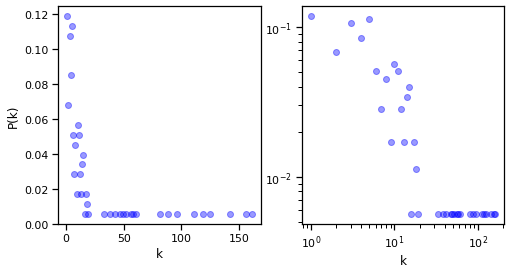

In [447]:
df_nodes = pd.DataFrame(data =dict(G_low.degree()), index = range(1)).T
df_nodes = df_nodes.reset_index()
df_nodes.columns = ['nodes', 'k']
df_nodes.head()

degree_dist = df_nodes.groupby('k').size().to_frame().reset_index()
degree_dist.columns = ['k', 'nk']
degree_dist['p(k)'] = degree_dist['nk'] / sum(degree_dist['nk'] )

degree_dist.head()
degree_dist = degree_dist.sort_values('k', ascending = False)

fig, axs = plt.subplots(1,2, facecolor='w', figsize=(8,4))
for i in range(2):
    axs[i].set_xlabel('k')
    axs[i].scatter(degree_dist['k'] ,degree_dist['p(k)'], color = 'b',alpha = 0.4)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[0].set_ylabel('P(k)')
plt.show()

gamma: -1.14358


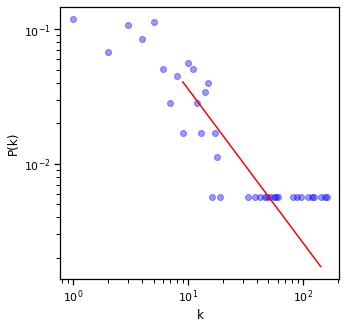

In [448]:
from scipy import optimize
def func(x, a, b): return b*(x**a)


x =degree_dist['k'][2:-8]
y =degree_dist['p(k)'][2:-8]

params, params_covariance = optimize.curve_fit(func, x, y, p0=[2, 2])

print('gamma:',round(params[0],5))


fig, axs = plt.subplots(1,1, facecolor='w', figsize=(5,5))
axs.scatter(degree_dist['k'] ,degree_dist['p(k)'], color = 'b',alpha = 0.4)
axs.plot(np.sort(x), func(np.sort(x), params[0], params[1]), color = 'red' )
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_xlabel('k')
axs.set_ylabel('P(k)')
plt.show()

In [323]:
# SHORTEST PATH 
sh_path_ = dict(nx.all_pairs_shortest_path_length(G_low))
sh_path =np.array([list(sh_path_[i].values()) for i in range(len(sh_path_))]).flatten()

# CLUSTERING COEFFICIENT 
cl = nx.clustering(G).values()

# print(f'AVG SHORTEST PATH: {sum(sh_path)/len(sh_path)},\nN° AVG CLUSTERING COEFFICIENT : {sum(cl)/len(cl)}')

KeyError: 0

## Oriented multigraph

In [1088]:
import numpy as np
# dictionaries for directed multigraph

all_emigrants_low['edges'] = [(t,f) for t,f in zip(all_emigrants_low['country_from'], all_emigrants_low['country_to'])]
all_emigrants_medium['edges'] = [(t,f) for t,f in zip(all_emigrants_medium['country_from'], all_emigrants_medium['country_to'])]
all_emigrants_high['edges'] = [(t,f) for t,f in zip(all_emigrants_high['country_from'], all_emigrants_high['country_to'])]

def get_weights(df):
    
    total_flow_by_year = df[years].sum().values
    for i, col in enumerate(df[years].columns):
        df[col] = np.sqrt(df[col]*10000 / total_flow_by_year[i])

get_weights(all_emigrants_low)
get_weights(all_emigrants_medium)
get_weights(all_emigrants_high)

all_emigrants_low_edges = all_emigrants_low[['edges', '1980', '1985', '1990', '1995', '2000', '2005', '2010']].set_index('edges').to_dict()
all_emigrants_medium_edges = all_emigrants_medium[['edges', '1980', '1985', '1990', '1995', '2000', '2005', '2010']].set_index('edges').to_dict()
all_emigrants_high_edges = all_emigrants_high[['edges', '1980', '1985', '1990', '1995', '2000', '2005', '2010']].set_index('edges').to_dict()


In [1090]:
g_low = nx.MultiDiGraph()
g_medium = nx.MultiDiGraph()
g_high = nx.MultiDiGraph()

In [1091]:
edges_low = [(k[0],k[1], {'weight': v, 'year': year}) 
             for year in all_emigrants_low_edges.keys() 
             for k,v in all_emigrants_low_edges[year].items()]
edges_medium = [(k[0],k[1], {'weight': v, 'year': year}) 
             for year in all_emigrants_medium_edges.keys() 
             for k,v in all_emigrants_medium_edges[year].items()]
edges_high = [(k[0],k[1], {'weight': v, 'year': year}) 
             for year in all_emigrants_high_edges.keys() 
             for k,v in all_emigrants_high_edges[year].items()]

In [1093]:
# add nodes and edges to networks

g_low.add_edges_from(edges_low)
g_medium.add_edges_from(edges_medium)
g_high.add_edges_from(edges_high)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1094]:
nx.path_weight(g_low, ['Afghanistan','Denmark'], 'weight')

0.10699854906448371

In [1111]:
# nx.get_edge_attributes(g_low, 'weight')

{('Afghanistan', 'Australia', 0): 0.0,
 ('Afghanistan', 'Australia', 1): 0.0,
 ('Afghanistan', 'Australia', 2): 0.6880509273808904,
 ('Afghanistan', 'Australia', 3): 0.9591250289730846,
 ('Afghanistan', 'Australia', 4): 1.356415710677043,
 ('Afghanistan', 'Australia', 5): 1.2817336463702427,
 ('Afghanistan', 'Australia', 6): 1.218431487904702,
 ('Afghanistan', 'Canada', 0): 0.0976758649049017,
 ('Afghanistan', 'Canada', 1): 0.37638192629631184,
 ('Afghanistan', 'Canada', 2): 0.8919757006819805,
 ('Afghanistan', 'Canada', 3): 1.1942503218847764,
 ('Afghanistan', 'Canada', 4): 1.5122342348316526,
 ('Afghanistan', 'Canada', 5): 1.8059879056928956,
 ('Afghanistan', 'Canada', 6): 1.871930945308813,
 ('Afghanistan', 'Switzerland', 0): 0.0,
 ('Afghanistan', 'Switzerland', 1): 0.2802177253588427,
 ('Afghanistan', 'Switzerland', 2): 0.41827906581572183,
 ('Afghanistan', 'Switzerland', 3): 0.488768009127456,
 ('Afghanistan', 'Switzerland', 4): 0.520650630663425,
 ('Afghanistan', 'Switzerland', 5

In [1098]:
# getting node colors for each graph

def get_node_colors(graph):
    
    node_colors = {}
    for country in graph.nodes():
        if country in destinations: 
            node_colors[country] = 'green'
        else:
            node_colors[country] = 'red'            
#         print(node_colors)
    return [node_colors.get(country) for country in graph.nodes()]

def get_node_size(df, graph, year):
    
    node_sizes = {}
    for country in graph.nodes():
        if country in destinations:
            node_sizes[country] = df.groupby('coutry_to').sum().loc[country, year]*10000 / df.groupby('coutry_to').sum()[year].sum()
        else:
            node_sizes[country] = df.groupby('coutry_from').sum().loc[country, year]*10000 / df.groupby('coutry_from').sum()[year].sum()
    node_sizes = [node_sizes.get(country) for country in list(graph.nodes())]
    
    return node_sizes

def get_labels(df, graph, year):
    
    labels = list(graph.nodes())
    mean_node_size = get_node_size(df, graph, year).mean()
    big_nodes = [k for k,v in zip(graph.nodes(), get_node_size(df, graph, year)) if v > mean_node_size] 
    labels = {}
    for node in graph.nodes():
        if node in big_nodes:
            labels[node] = node
    return labels

In [1099]:

# TODO: write a loop creating graphs for each year , search for dynamic graph...? 
# run a simulation! plot graphs in a loop

# filter edges to display with weight above mean
# filter nodes to display with size above mean 
# add map to the backgroud
# add title for each graph
# for eu countries - outgoing edges are red, incoming are green

def draw_graph(graph, df, year): # modify this 
    plt.figure(figsize=(15,12))
    node_sizes = get_node_size(df_to, graph, year)
    node_color = get_node_colors(df_from, graph, year)
    labels = get_labels(df_to, graph, year)
    pos = nx.layout.kamada_kawai_layout(graph)
    nodes = nx.draw_networkx_nodes(graph, pos, node_size = node_sizes, node_color = node_color)
    edges = nx.draw_networkx_edges(
        graph,
        pos,
        node_size=node_sizes,
        arrowstyle="->",
        arrowsize=9,
        alpha = 0.5,
        edgelist = 
        edge_color='grey',
#         edge_cmap=plt.cm.Blues,
        width=2)
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)
    


In [ ]:
draw_graph(graph, df, year)

In [1141]:
# g_low['Afghanistan']['Australia'][4]['weight']
# # np.array(list(nx.get_edge_attributes(g_low, 'weight').values())).mean()

# g_low.edges()

OutMultiEdgeDataView([('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Australia'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Canada'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Switzerland'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Denmark'), ('Afghanistan', 'Denmark'), ('Afghanistan', 'Denmark'), ('Afghanistan', 'Denmark'), ('Afghanistan', 'Denmark'), ('Afghanistan', 'De

In [1135]:
def filter_edge(graph, n1, n2, key):
    return g[n1][n2][key]['weight'] > np.array(list(nx.get_edge_attributes(graph, 'weight').values())).mean()
#     return g[n1][n2][key]['year'] == '1980'

# view = nx.subgraph_view(g_low, filter_edge=filter_edge)
# view.edges()

edgelist = []
for edge in g_low.edges():
    
    if filter_edge(g_low, edge[0], edge[1], ):
        edgelist.append(edge)

('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Australia')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Canada')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Switzerland')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Germany')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Denmark')
('Afghanistan', 'Fra

('Egypt', 'United Kingdom')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Greece')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Netherlands')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'Sweden')
('Egypt', 'United States')
('Egypt', 'United States')
('Egypt', 'United States')
('Egypt', 'United States')
('Egypt', 'United States')
('Egypt', 'United States')
('Egypt', 'United States')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Australia')
('El Salvador', 'Canada')
('El Salvador', 'Canada')
('El Salvador', 'Canada')
('El Salvador', 'Canada')
('El Salvador', 'Cana

('Iran', 'Canada')
('Iran', 'Canada')
('Iran', 'Canada')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Switzerland')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Germany')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Denmark')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'Finland')
('Iran', 'France')
('Iran', 'France')
('Iran', 'France')
('Iran', 'France')
('Iran', 'France')
('Iran', 'France')
('Iran', 'France')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'United Kingdom')
('Iran', 'Netherlands')
('Iran', 

('Nigeria', 'Germany')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'France')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'United Kingdom')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Ireland')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'Netherlands')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Nigeria', 'United States')
('Norway', 'Australia')
('Norway', 'Australia')
('Norway', '

('Poland', 'Denmark')
('Poland', 'Denmark')
('Poland', 'Denmark')
('Poland', 'Denmark')
('Poland', 'Denmark')
('Poland', 'Denmark')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'Finland')
('Poland', 'France')
('Poland', 'France')
('Poland', 'France')
('Poland', 'France')
('Poland', 'France')
('Poland', 'France')
('Poland', 'France')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'United Kingdom')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Greece')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Ireland')
('Poland', 'Netherlands')
('Poland', 'Netherlands')
('Poland', 

('Singapore', 'Australia')
('Singapore', 'Australia')
('Singapore', 'Australia')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'Canada')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'United Kingdom')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'Netherlands')
('Singapore', 'United States')
('Singapore', 'United States')
('Singapore', 'United States')
('Singapore', 'United States')
('Singapore', 'United States')
('Singapore', 'United States')
('Singapore', 'United States')
('Slovakia', 'Australia')
('Slovakia', 'Australia')
('Slovakia', 'Australia')
('Slovakia', 'Australia')
('S

('United States', 'Denmark')
('United States', 'Denmark')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'Finland')
('United States', 'France')
('United States', 'France')
('United States', 'France')
('United States', 'France')
('United States', 'France')
('United States', 'France')
('United States', 'France')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'United Kingdom')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Greece')
('United States', 'Ireland')
('United States', 'Ireland')
('United States', 'Ireland')
('United

('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'Germany')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'France')
('Senegal', 'United States')
('Senegal', 'United States')
('Senegal', 'United States')
('Senegal', 'United States')
('Senegal', 'United States')
('Senegal', 'United States')
('Senegal', 'United States')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Canada')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'Germany')
('Sierra Leone', 'United Kingdom')
('Sierra Leone', 'United Kingdom')
('Sierra Leone', 'United Ki

In [1130]:
nx.subgraph_view(g_low, filter_edge=filter_edge).edges()

KeyError: 0